In [60]:
import pandas as pd
import numpy as np
from gensim import corpora, models, similarities
import matplotlib 
%matplotlib inline 

In [2]:
df = pd.read_csv('Bhutan_input.csv')

In [3]:
df = df.iloc[:,:3]

In [98]:
df

,paragraph Nun,Sector Num,text,clean text
0,1,1,Clarifying goals and raising performance stand...,Clarifying goals and raising performance stand...
1,2,1,Curriculum improvements to deliver educational...,Curriculum improvements to deliver educational...
2,3,1,Attracting the best talent into teaching by re...,Attracting the best talent into teaching by re...
3,4,1,Giving teachers the skills and tools to raise ...,Giving teachers the skills and tools to raise ...
4,5,1,Developing Principals to become Instructional ...,Developing Principals to become Instructional ...
5,6,1,Enabling the capacity of schools to focus on l...,Enabling the capacity of schools to focus on l...
6,7,1,Maintain relentless focus on implementation _ ...,Maintain relentless focus on implementation de...
7,8,1,������� Ensuring students grasp basic academic...,Ensuring students grasp basic academic acquire...
8,9,1,The possible introduction of a vouchers scheme...,The possible introduction of a vouchers scheme...
9,10,1,Targeted intervention programmes: Targeted int...,Targeted intervention Targeted intervention pr...


In [5]:
text_list = df['text'].tolist()

In [7]:
text_list = [[w for w in para.split() if w.isalpha() or w.isdigit()] for para in text_list ]

In [97]:
clean_text_list = [' '.join(para) for para in text_list]
df['clean text'] = pd.Series(clean_text_list)

In [9]:
print text_list

[['Clarifying', 'goals', 'and', 'raising', 'performance', 'standards', 'for', 'schools', 'through', 'shared', 'national', 'education', 'goals', 'that', 'are', 'aligned', 'with', 'the', 'national', 'learning', 'standards', 'and', 'quality', 'teaching', 'processes'], ['Curriculum', 'improvements', 'to', 'deliver', 'educational', 'goals', 'with', 'greater', 'involvement', 'of', 'principals', 'and', 'teachers', 'in', 'curriculum', 'design', 'and', 'communication', 'and', 'training', 'on', 'improved', 'curriculum'], ['Attracting', 'the', 'best', 'talent', 'into', 'teaching', 'by', 'recruiting', 'the', 'most', 'capable', 'candidates', 'into', 'teaching', 'and', 'preparing', 'them', 'for', 'effective', 'classroom', 'practice'], ['Giving', 'teachers', 'the', 'skills', 'and', 'tools', 'to', 'raise', 'the', 'quality', 'of', 'classroom', 'instruction', 'through', 'continuous', 'professional', 'development', 'and', 'structured', 'learning', 'resources'], ['Developing', 'Principals', 'to', 'become'

In [12]:
dictionary = corpora.Dictionary(text_list)
print dictionary
print dictionary.token2id

Dictionary(1324 unique tokens: [u'limited', u'all', u'CSIs', u'prioritized', u'oral']...)
{u'limited': 1157, u'all': 313, u'CSIs': 773, u'prioritized': 547, u'oral': 1226, u'lack': 158, u'focus': 74, u'Tango': 1259, u'Improvement': 901, u'leads': 403, u'facilities': 76, u'per': 651, u'Professional': 215, u'go': 370, u'expressions': 1236, u'settlement': 1194, u'children': 128, u'issues': 749, u'equipment': 1017, u'essentials': 93, u'Business': 744, u'warning': 904, u'flash': 819, u'centers': 1123, u'opportunities': 963, u'environment': 253, u'to': 30, u'earthquake': 830, u'program': 172, u'Adaptation': 1112, u'preserved': 1232, u'under': 657, u'Preservation': 1255, u'teaching': 15, u'suspension': 1141, u'include': 138, u'Tourism': 660, u'friendly': 771, u'resources': 61, u'activities': 139, u'Training': 204, u'global': 332, u'Gelephu': 1010, u'risk': 824, u'advantage': 1203, u'additi': 665, u'very': 140, u'Phuentsholing': 733, u'social': 1229, u'continues': 182, u'results': 185, u'plann

In [13]:
doc_vector = [dictionary.doc2bow(text) for text in text_list]
doc_vector

[[(0, 1),
  (1, 2),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 2),
  (8, 2),
  (9, 1),
  (10, 1),
  (11, 2),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1)],
 [(1, 3),
  (6, 1),
  (11, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 2),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1)],
 [(1, 1),
  (4, 1),
  (15, 2),
  (16, 2),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 2),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1)],
 [(1, 2),
  (10, 1),
  (12, 1),
  (16, 2),
  (18, 1),
  (26, 1),
  (30, 1),
  (33, 1),
  (38, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1)],
 [(1, 1),
  (2, 1),
  (10, 1),
  (30, 1),
  (59, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1)],


In [16]:
tfidf = models.TfidfModel(doc_vector)
doc_tfidf = tfidf[doc_vector] 

In [17]:
#LSI Model

lsi = models.LsiModel(doc_tfidf, id2word=dictionary , num_topics = 10)

doc_lsi = lsi[doc_tfidf]

for doc in doc_lsi:
    print doc

[(0, -0.1438631618187636), (1, 0.043854061991691444), (2, -0.2473475274832854), (3, -0.20813804787259951), (4, -0.05923386162394683), (5, 0.12316782396085151), (6, 0.097721262181630422), (7, 0.0033580784348055132), (8, -0.008012824724372463), (9, -0.10698479960988014)]
[(0, -0.1135319082366316), (1, 0.023499369242271327), (2, -0.11307288092128515), (3, -0.096796144880833115), (4, -0.00374206849722013), (5, 0.089372786540246885), (6, 0.078202144011557173), (7, -0.055076434384397736), (8, -0.034012392354723732), (9, -0.14059182889181807)]
[(0, -0.077104680594372602), (1, 0.01611623049346711), (2, -0.080702137668471702), (3, -0.07090244699545166), (4, -0.054236405886325806), (5, 0.04447839406564686), (6, 0.027321183052397384), (7, 0.042173949784740095), (8, -0.019047007061050829), (9, -0.047136396862112677)]
[(0, -0.15050595278324586), (1, -0.010756655690822892), (2, -0.14342510673857198), (3, -0.20386784308872544), (4, -0.14168831136855928), (5, 0.09586540940354174), (6, 0.07176921741733

In [21]:
index = similarities.MatrixSimilarity(lsi[doc_vector])

In [19]:
# Test LSI model use one SDG goal 


query = ' By 2030, eradicate extreme poverty for all people everywhere, currently measured as people living on less than $1.25 a day'
query_bow = dictionary.doc2bow(query.split())
query_lsi = lsi[query_bow]

sims = index[query_lsi]
print list(enumerate(sims))

[(0, 0.27369219), (1, 0.58293176), (2, 0.5172475), (3, 0.40752643), (4, 0.096853882), (5, 0.43539608), (6, 0.73284179), (7, 0.53478146), (8, 0.5902158), (9, 0.77006632), (10, 0.6846109), (11, 0.74838442), (12, 0.44971108), (13, 0.6201967), (14, 0.68673366), (15, 0.4167203), (16, 0.61922526), (17, 0.65266067), (18, 0.47978181), (19, 0.3971886), (20, 0.62216944), (21, 0.53782153), (22, 0.7330358), (23, 0.57800728), (24, 0.75319833), (25, 0.72564638), (26, -0.063503087), (27, 0.66327047), (28, 0.7934432), (29, 0.51214427), (30, 0.53511953), (31, -0.087901011), (32, 0.76127321), (33, 0.83514333), (34, 0.59435523), (35, 0.6071279), (36, -0.02669929), (37, 0.7630806), (38, 0.39906272), (39, 0.44562167), (40, 0.16773775), (41, 0.23468491), (42, 0.75439566), (43, 0.62999582), (44, 0.59719318), (45, 0.45882043), (46, -0.0032920945), (47, 0.029480614), (48, -0.039629094), (49, -0.0055609979), (50, 0.0062446389), (51, 0.052382912), (52, 0.14287096), (53, 0.063763626), (54, 0.68746036), (55, 0.646

In [20]:
sims

array([ 0.27369219,  0.58293176,  0.5172475 ,  0.40752643,  0.09685388,
        0.43539608,  0.73284179,  0.53478146,  0.5902158 ,  0.77006632,
        0.6846109 ,  0.74838442,  0.44971108,  0.6201967 ,  0.68673366,
        0.4167203 ,  0.61922526,  0.65266067,  0.47978181,  0.3971886 ,
        0.62216944,  0.53782153,  0.7330358 ,  0.57800728,  0.75319833,
        0.72564638, -0.06350309,  0.66327047,  0.7934432 ,  0.51214427,
        0.53511953, -0.08790101,  0.76127321,  0.83514333,  0.59435523,
        0.6071279 , -0.02669929,  0.7630806 ,  0.39906272,  0.44562167,
        0.16773775,  0.23468491,  0.75439566,  0.62999582,  0.59719318,
        0.45882043, -0.00329209,  0.02948061, -0.03962909, -0.005561  ,
        0.00624464,  0.05238291,  0.14287096,  0.06376363,  0.68746036,
        0.6462906 ,  0.83604938,  0.75374979,  0.86495757,  0.66437697,
        0.78008515,  0.70032805,  0.69919223,  0.20180969,  0.64843875,
        0.72761041,  0.86727953,  0.76761264,  0.70130312,  0.55

In [23]:
len(sims)

126

In [34]:
type(sims)

numpy.ndarray

In [132]:
SDG = pd.read_csv('SDG goals-v.2.csv')
SDG.head()

,SDG Goal,Goal name,Goal Content,SDG sub Goal,SDG sub Goal content
0,1,Poverty,Goal 1. End poverty in all its forms everywhere,1.1,"1.1 By 2030, eradicate extreme poverty for all..."
1,1,Poverty,Goal 1. End poverty in all its forms everywhere,1.2,"1.2 By 2030, reduce at least by half the propo..."
2,1,Poverty,Goal 1. End poverty in all its forms everywhere,1.3,1.3 Implement nationally appropriate social pr...
3,1,Poverty,Goal 1. End poverty in all its forms everywhere,1.4,"1.4 By 2030, ensure that all men and women, in..."
4,1,Poverty,Goal 1. End poverty in all its forms everywhere,1.5,"1.5 By 2030, build the resilience of the poor ..."


In [133]:
def sim(row):
    query = row['SDG sub Goal content'].split()[1:]
    query = [w for w in query if w.isalpha() or w.isdigit()]
    query_bow = dictionary.doc2bow(query)
    query_lsi = lsi[query_bow]
    
    sims = index[query_lsi]
    return pd.Series(sims)

In [134]:
matrix = SDG.apply(sim, axis = 1)
matrix

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
0,0.273692,0.582932,0.517247,0.407526,0.096854,0.435396,0.732842,0.534781,0.590216,0.770066,...,0.469822,0.861888,0.680086,0.163476,-0.032011,0.793576,0.804516,0.923869,0.739283,0.656872
1,0.567141,0.774660,0.766531,0.663206,0.375110,0.692367,0.847704,0.706516,0.664749,0.927197,...,0.542610,0.918743,0.787097,0.215425,-0.031628,0.876414,0.894517,0.962990,0.781739,0.718670
2,0.499409,0.701055,0.788494,0.660648,0.350240,0.685848,0.860610,0.760364,0.673126,0.905239,...,0.640114,0.928752,0.880465,0.398269,-0.007900,0.961697,0.939722,0.945320,0.866446,0.820928
3,0.568954,0.744084,0.818898,0.669959,0.381700,0.724146,0.889343,0.718771,0.703669,0.942509,...,0.574283,0.945578,0.826518,0.256361,-0.021355,0.959080,0.894447,0.945488,0.805326,0.787808
4,0.528966,0.773577,0.802339,0.694179,0.437117,0.740732,0.924350,0.681655,0.584888,0.904613,...,0.732892,0.980079,0.871390,0.398352,-0.023498,0.966351,0.902279,0.905911,0.775306,0.785018
5,0.575841,0.734420,0.806513,0.765222,0.451910,0.726501,0.793329,0.844569,0.697229,0.892433,...,0.646036,0.903794,0.858603,0.389937,0.028259,0.848145,0.948454,0.951988,0.848388,0.768456
6,0.674926,0.824479,0.881635,0.885619,0.631714,0.852100,0.846289,0.815359,0.539058,0.884049,...,0.745268,0.891560,0.873663,0.518085,0.079330,0.870274,0.927470,0.853602,0.752548,0.790255
7,0.547708,0.752221,0.776505,0.673326,0.357656,0.682156,0.833850,0.761369,0.692376,0.922945,...,0.568984,0.928024,0.831877,0.283140,0.094779,0.915834,0.926415,0.972161,0.832602,0.835902
8,0.535392,0.775411,0.776909,0.662147,0.369034,0.697964,0.890763,0.705757,0.631116,0.929544,...,0.619669,0.952108,0.842575,0.306474,-0.011809,0.936349,0.920790,0.958955,0.808953,0.778542
9,0.560178,0.777114,0.814730,0.714256,0.505215,0.737332,0.808340,0.793526,0.654017,0.854315,...,0.802722,0.916928,0.926010,0.502349,0.046159,0.959553,0.911151,0.878663,0.803400,0.853535


In [52]:
type(matrix)

pandas.core.frame.DataFrame

In [55]:
matrix['max'] = matrix.apply(lambda row:np.max(row),axis = 1)
    

In [128]:
matrix

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
0,0.273692,0.582932,0.517247,0.407526,0.096854,0.435396,0.732842,0.534781,0.590216,0.770066,...,0.469822,0.861888,0.680086,0.163476,-0.032011,0.793576,0.804516,0.923869,0.739283,0.656872
1,0.567141,0.774660,0.766531,0.663206,0.375110,0.692367,0.847704,0.706516,0.664749,0.927197,...,0.542610,0.918743,0.787097,0.215425,-0.031628,0.876414,0.894517,0.962990,0.781739,0.718670
2,0.499409,0.701055,0.788494,0.660648,0.350240,0.685848,0.860610,0.760364,0.673126,0.905239,...,0.640114,0.928752,0.880465,0.398269,-0.007900,0.961697,0.939722,0.945320,0.866446,0.820928
3,0.568954,0.744084,0.818898,0.669959,0.381700,0.724146,0.889343,0.718771,0.703669,0.942509,...,0.574283,0.945578,0.826518,0.256361,-0.021355,0.959080,0.894447,0.945488,0.805326,0.787808
4,0.528966,0.773577,0.802339,0.694179,0.437117,0.740732,0.924350,0.681655,0.584888,0.904613,...,0.732892,0.980079,0.871390,0.398352,-0.023498,0.966351,0.902279,0.905911,0.775306,0.785018
5,0.575841,0.734420,0.806513,0.765222,0.451910,0.726501,0.793329,0.844569,0.697229,0.892433,...,0.646036,0.903794,0.858603,0.389937,0.028259,0.848145,0.948454,0.951988,0.848388,0.768456
6,0.674926,0.824479,0.881635,0.885619,0.631714,0.852100,0.846289,0.815359,0.539058,0.884049,...,0.745268,0.891560,0.873663,0.518085,0.079330,0.870274,0.927470,0.853602,0.752548,0.790255
7,0.547708,0.752221,0.776505,0.673326,0.357656,0.682156,0.833850,0.761369,0.692376,0.922945,...,0.568984,0.928024,0.831877,0.283140,0.094779,0.915834,0.926415,0.972161,0.832602,0.835902
8,0.535392,0.775411,0.776909,0.662147,0.369034,0.697964,0.890763,0.705757,0.631116,0.929544,...,0.619669,0.952108,0.842575,0.306474,-0.011809,0.936349,0.920790,0.958955,0.808953,0.778542
9,0.560178,0.777114,0.814730,0.714256,0.505215,0.737332,0.808340,0.793526,0.654017,0.854315,...,0.802722,0.916928,0.926010,0.502349,0.046159,0.959553,0.911151,0.878663,0.803400,0.853535


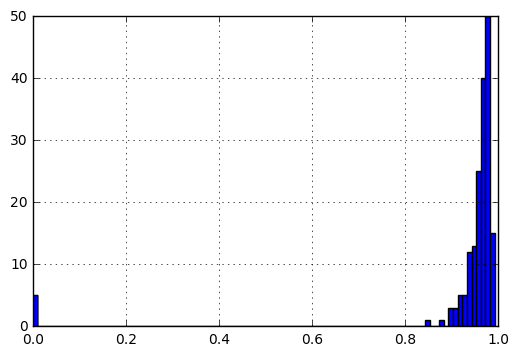

In [62]:
matrix['max'].hist(bins = 100)

In [63]:
matrix['max'].mean()

0.9338204381840952

In [135]:
#decide to set threashold = 0.94

matrix[matrix<0.94]=0

In [136]:
SDG['para_match'] = matrix.apply(lambda row:row[row!=0].index.tolist(), axis = 1)

In [137]:
SDG

,SDG Goal,Goal name,Goal Content,SDG sub Goal,SDG sub Goal content,para_match
0,1,Poverty,Goal 1. End poverty in all its forms everywhere,1.1,"1.1 By 2030, eradicate extreme poverty for all...",[112]
1,1,Poverty,Goal 1. End poverty in all its forms everywhere,1.2,"1.2 By 2030, reduce at least by half the propo...","[56, 97, 112, 123]"
2,1,Poverty,Goal 1. End poverty in all its forms everywhere,1.3,1.3 Implement nationally appropriate social pr...,"[32, 37, 58, 66, 74, 77, 87, 94, 98, 121, 123]"
3,1,Poverty,Goal 1. End poverty in all its forms everywhere,1.4,"1.4 By 2030, ensure that all men and women, in...","[9, 11, 32, 37, 58, 94, 98, 117, 121, 123]"
4,1,Poverty,Goal 1. End poverty in all its forms everywhere,1.5,"1.5 By 2030, build the resilience of the poor ...","[56, 58, 71, 77, 94, 97, 117, 121]"
5,1,Poverty,Goal 1. End poverty in all its forms everywhere,1.a,1.a Ensure significant mobilization of resourc...,"[56, 74, 77, 108, 122, 123]"
6,1,Poverty,Goal 1. End poverty in all its forms everywhere,1.b,1.b Create sound policy frameworks at the nati...,"[56, 77, 114]"
7,2,Hunger,"Goal 2. End hunger, achieve food security and ...",2.1,"2.1 By 2030, end hunger and ensure access by a...","[56, 58, 97, 123]"
8,2,Hunger,"Goal 2. End hunger, achieve food security and ...",2.2,"2.2 By 2030, end all forms of malnutrition, in...","[56, 58, 97, 117, 123]"
9,2,Hunger,"Goal 2. End hunger, achieve food security and ...",2.3,"2.3 By 2030, double the agricultural productiv...","[42, 121]"


In [138]:
#Add matched para text in SDG 
def add_text(row):
    para_list = row['para_match']
    
    if len(para_list) ==0:
        text = '--'
    else:
        text_list = [df.ix[i,'clean text'] for i in para_list]
        text = '\n'.join(text_list)
    return text

SDG['match text'] = SDG.apply(add_text,axis = 1)

In [139]:
SDG.to_csv('SDG_match_text.csv')

In [140]:
df_result = pd.merge(df,matrix.T,left_index= True, right_index = True)
df_result.head()

,paragraph Nun,Sector Num,text,clean text,0,1,2,3,4,5,...,159,160,161,162,163,164,165,166,167,168
0,1,1,Clarifying goals and raising performance stand...,Clarifying goals and raising performance stand...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1,Curriculum improvements to deliver educational...,Curriculum improvements to deliver educational...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,Attracting the best talent into teaching by re...,Attracting the best talent into teaching by re...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,Giving teachers the skills and tools to raise ...,Giving teachers the skills and tools to raise ...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1,Developing Principals to become Instructional ...,Developing Principals to become Instructional ...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
gb = df_result.groupby('Sector Num').agg(sum)
del gb['paragraph Nun']

In [142]:
gb.columns = SDG['SDG sub Goal ']

In [143]:
gb.head()

SDG sub Goal,1.1,1.2,1.3,1.4,1.5,1.a,1.b,2.1,2.2,2.3,...,17.1,17.11,17.12,17.13,17.14,17.15,17.16,17.17,17.18,17.19
Sector Num,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.000000,1.888472,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.962128,1.913583,0.000000,0.0,0.0,0.0,0.972217,0.000000,1.908077,0.0
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.945271,0.000000,0.0
3,0.0,0.0,0.977767,0.948982,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.940865,0.0,0.0,0.0,0.000000,0.954648,0.972148,0.0
4,0.0,0.0,0.944346,0.950675,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.958169,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
5,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.950709,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.969902,0.000000,0.0


In [144]:
gb.to_csv('Sector_match_result.csv')